In [12]:
###DATA CLEANING AND LOADING
# ================================
# STEP 1: Data Loading & Cleaning
# ================================

import pandas as pd
import numpy as np

# ----------------
# 1. Load in Chunks
# ----------------
# Adjust chunksize based on RAM (500k is a safe start)
chunk_list = []
chunksize = 500_000

file_path = r"C:\Users\plvth\Downloads\Fraud_data.csv.csv"


for chunk in pd.read_csv(file_path, chunksize=chunksize):
    chunk_list.append(chunk)

df = pd.concat(chunk_list, ignore_index=True)
print(f"Data Loaded: {df.shape[0]:,} rows and {df.shape[1]} columns")

# ----------------
# 2. Quick Overview
# ----------------
print("\n Dataset Info:")
print(df.info())

print("\n First 5 rows:")
print(df.head())

# ----------------
# 3. Handle Missing Values
# ----------------
missing_summary = df.isnull().sum()
print("\n Missing Values Summary:")
print(missing_summary)

# Drop columns with >50% missing
cols_to_drop = missing_summary[missing_summary > 0.5 * len(df)].index
df.drop(columns=cols_to_drop, inplace=True)

# Fill numeric NaNs with median
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].median())

# Fill categorical NaNs with mode
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# ----------------
# 4. Outlier Detection & Treatment
# ----------------
# Using IQR method for numeric columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Cap extreme outliers
    df[col] = np.where(df[col] < lower_bound, lower_bound,
                       np.where(df[col] > upper_bound, upper_bound, df[col]))

print("\n-->Data Cleaning Completed")
print(df.describe().T)


Data Loaded: 6,362,620 rows and 11 columns

 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB
None

 First 5 rows:
   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0     1   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1     1   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2     1  TRANSFER    181.00  C1305486145          181.0            0.00   
3     1  CASH_OUT    181.00   C840083671          181.0           

Data Loaded: 6362620 rows and 11 columns

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            float64
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         float64
 10  isFlaggedFraud  float64
dtypes: float64(8), object(3)
memory usage: 534.0+ MB
None 

First 5 rows:
   step      type    amount     nameOrig  oldbalanceOrg  newbalanceOrig  \
0   1.0   PAYMENT   9839.64  C1231006815       170136.0       160296.36   
1   1.0   PAYMENT   1864.28  C1666544295        21249.0        19384.72   
2   1.0  TRANSFER    181.00  C1305486145          181.0            0.00   
3   1.0  CASH_OUT    181.00   C840083671          181.0            0.00   
4   

C:\Users\plvth\anaconda3\Lib\site-packages\seaborn\categorical.py:645: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  g_vals = grouped_vals.get_group(g)


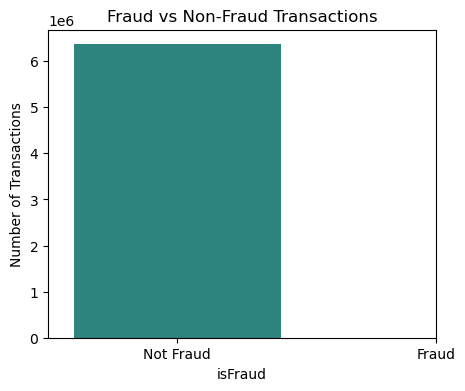

💡 Fraud cases percentage: 0.0000%



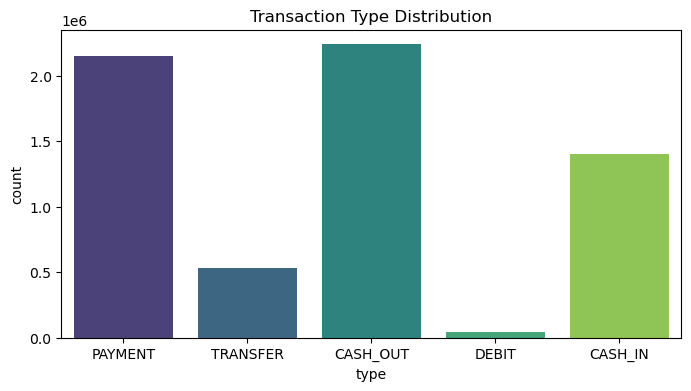

No fraud transactions found, skipping fraud rate by type.



C:\Users\plvth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


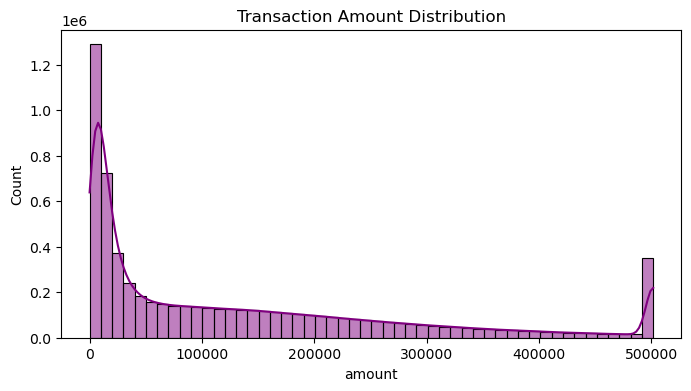

No fraud transactions found, skipping amount-by-type boxplot.



C:\Users\plvth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\plvth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


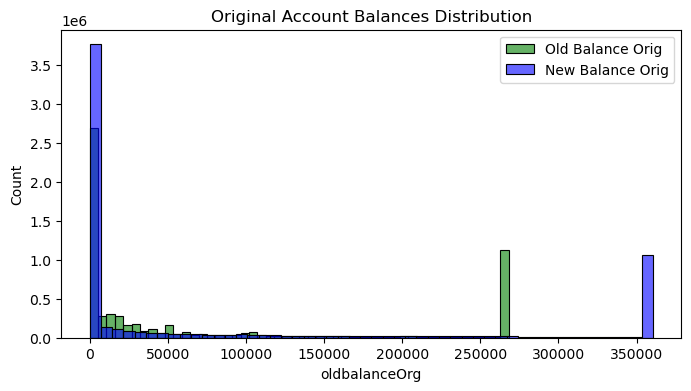

C:\Users\plvth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\plvth\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


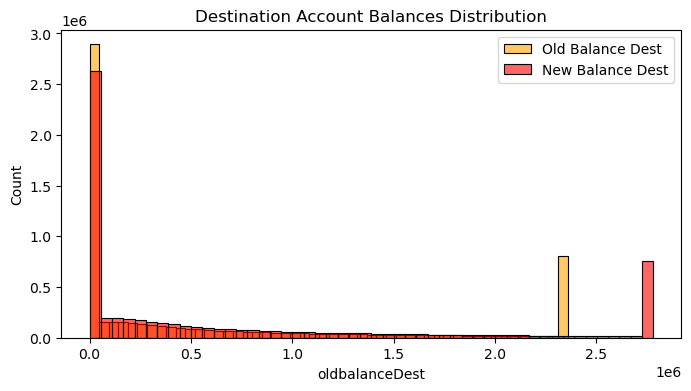

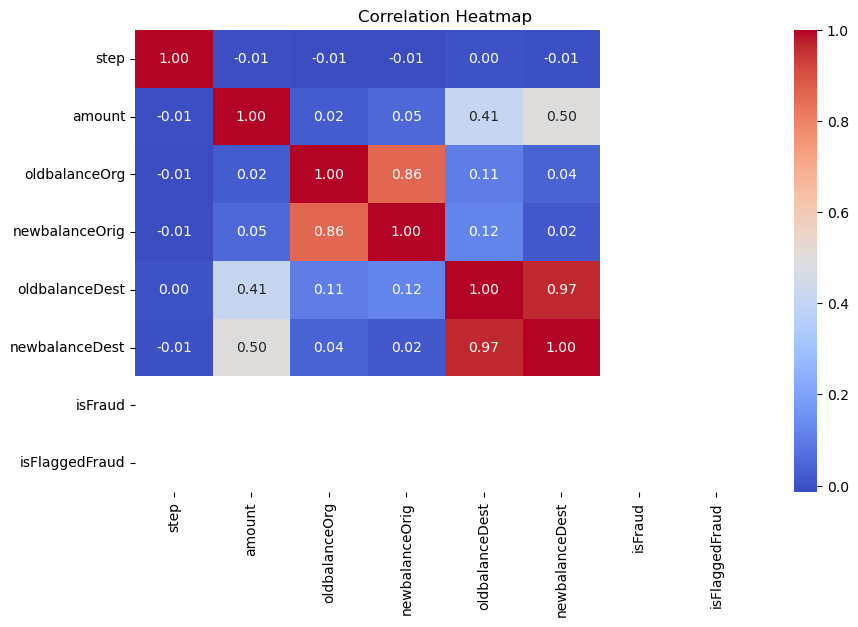

Summary Statistics:
               step        amount  oldbalanceOrg  newbalanceOrig  \
count  6.362620e+06  6.362620e+06   6.362620e+06    6.362620e+06   
mean   2.422653e+02  1.322667e+05   7.221247e+04    8.872275e+04   
std    1.391004e+02  1.462368e+05   1.024141e+05    1.393412e+05   
min    1.000000e+00  0.000000e+00   0.000000e+00    0.000000e+00   
25%    1.560000e+02  1.338957e+04   0.000000e+00    0.000000e+00   
50%    2.390000e+02  7.487194e+04   1.420800e+04    0.000000e+00   
75%    3.350000e+02  2.087215e+05   1.073152e+05    1.442584e+05   
max    6.035000e+02  5.017193e+05   2.682879e+05    3.606460e+05   

       oldbalanceDest  newbalanceDest    isFraud  isFlaggedFraud  
count    6.362620e+06    6.362620e+06  6362620.0       6362620.0  
mean     6.003940e+05    7.150404e+05        0.0             0.0  
std      8.369711e+05    9.673665e+05        0.0             0.0  
min      0.000000e+00    0.000000e+00        0.0             0.0  
25%      0.000000e+00    0.00000

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load your dataset
# df = pd.read_csv("your_file_path.csv")

# --- 1. Basic Info ---
print("Data Loaded:", df.shape[0], "rows and", df.shape[1], "columns\n")
print("Dataset Info:")
print(df.info(), "\n")

print("First 5 rows:")
print(df.head(), "\n")

# --- 2. Missing Values ---
print("Missing Values Summary:")
print(df.isnull().sum(), "\n")

# --- 3. Class Distribution ---
fraud_counts = df['isFraud'].value_counts()
plt.figure(figsize=(5,4))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette='viridis')
plt.xticks([0, 1], ['Not Fraud', 'Fraud'])
plt.ylabel("Number of Transactions")
plt.title("Fraud vs Non-Fraud Transactions")
plt.show()

fraud_percentage = df['isFraud'].mean() * 100
print(f"💡 Fraud cases percentage: {fraud_percentage:.4f}%\n")

# --- 4. Transaction Type Distribution ---
plt.figure(figsize=(8,4))
sns.countplot(data=df, x='type', palette='viridis')
plt.title("Transaction Type Distribution")
plt.show()

# --- 5. Fraud rate by transaction type (if frauds exist) ---
frauds = df[df['isFraud']==1]
if len(frauds) > 0:
    fraud_by_type = df.groupby('type')['isFraud'].mean() * 100
    print("📊 Fraud rate by transaction type (%):")
    print(fraud_by_type, "\n")
else:
    print("No fraud transactions found, skipping fraud rate by type.\n")

# --- 6. Transaction Amount Distribution ---
plt.figure(figsize=(8,4))
sns.histplot(df['amount'], bins=50, kde=True, color='purple')
plt.title("Transaction Amount Distribution")
plt.show()

# Amount vs Fraud (if frauds exist)
if len(frauds) > 0:
    # Sample non-frauds to reduce plot clutter
    non_frauds = df[df['isFraud']==0].sample(n=min(len(frauds)*5, len(df[df['isFraud']==0])), random_state=42)
    eda_df = pd.concat([frauds, non_frauds])
    
    plt.figure(figsize=(10,5))
    sns.boxplot(data=eda_df, x='type', y='amount', hue='isFraud', palette='coolwarm')
    plt.yscale('log')
    plt.title("Transaction Amount by Type (Fraud vs Non-Fraud)")
    plt.show()
else:
    print("No fraud transactions found, skipping amount-by-type boxplot.\n")

# --- 7. Balance Analysis ---
plt.figure(figsize=(8,4))
sns.histplot(df['oldbalanceOrg'], bins=50, color='green', label='Old Balance Orig', alpha=0.6)
sns.histplot(df['newbalanceOrig'], bins=50, color='blue', label='New Balance Orig', alpha=0.6)
plt.title("Original Account Balances Distribution")
plt.legend()
plt.show()

plt.figure(figsize=(8,4))
sns.histplot(df['oldbalanceDest'], bins=50, color='orange', label='Old Balance Dest', alpha=0.6)
sns.histplot(df['newbalanceDest'], bins=50, color='red', label='New Balance Dest', alpha=0.6)
plt.title("Destination Account Balances Distribution")
plt.legend()
plt.show()

# --- 8. Correlation Heatmap ---
numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(10,6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# --- 9. Summary Statistics ---
print("Summary Statistics:")
print(df.describe(), "\n")


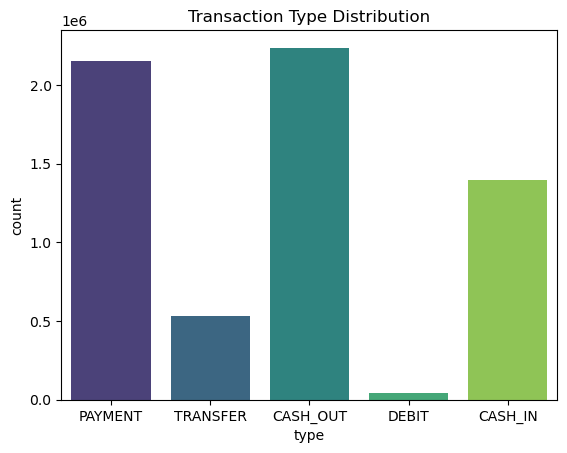

In [5]:
sns.countplot(data=df, x='type', palette='viridis')
plt.title("Transaction Type Distribution")
plt.show()


In [6]:
df['isFraud'].value_counts()


isFraud
0.0    6362620
Name: count, dtype: int64

In [13]:
import pandas as pd

# Load dataset (use raw string r"" to avoid backslash issues)
file_path = r"C:\Users\plvth\Downloads\creditcard.csv"
df = pd.read_csv(file_path)

# Basic info
print("Dataset Info:")
print(df.info())

# Check fraud distribution
print("\nFraud distribution:")
print(df['Class'].value_counts())
print(f" Fraud percentage: {df['Class'].mean() * 100:.4f}%")


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 

In [14]:
#  Check for duplicates
duplicates = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

# Optionally drop duplicates
if duplicates > 0:
    df = df.drop_duplicates()
    print("Duplicates removed.")

#  Check for negative or zero amounts (sometimes data errors)
print(f"Transactions with Amount <= 0: {(df['Amount'] <= 0).sum()}")

# Optional: Remove zero or negative amounts if needed
df = df[df['Amount'] > 0]

print("Data cleaning completed.")


Number of duplicate rows: 1081
Duplicates removed.
Transactions with Amount <= 0: 1808
Data cleaning completed.


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 

C:\Users\plvth\AppData\Local\Temp\ipykernel_27376\33245938.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette='viridis')


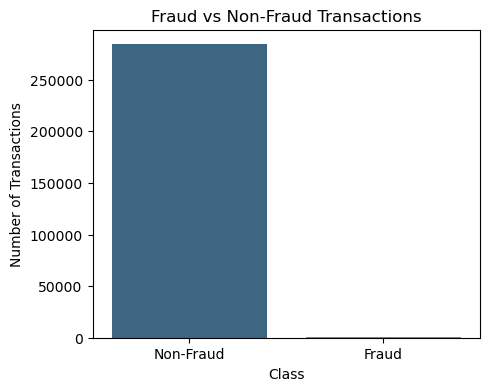

 Fraud cases percentage: 0.1727%


C:\Users\plvth\AppData\Local\Temp\ipykernel_27376\33245938.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df[df['Amount'] < 5000], x='Class', y='Amount', palette='coolwarm')  # limit for visibility


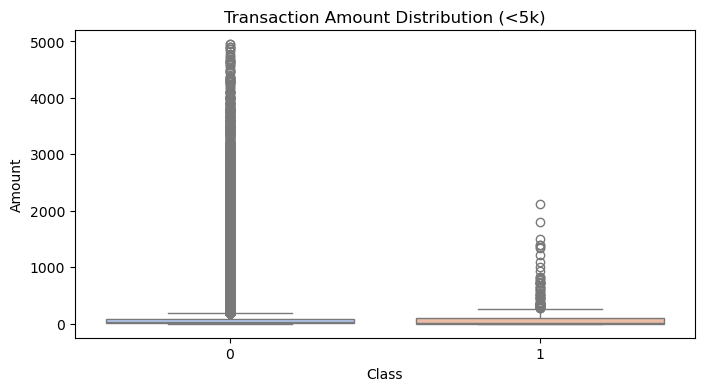

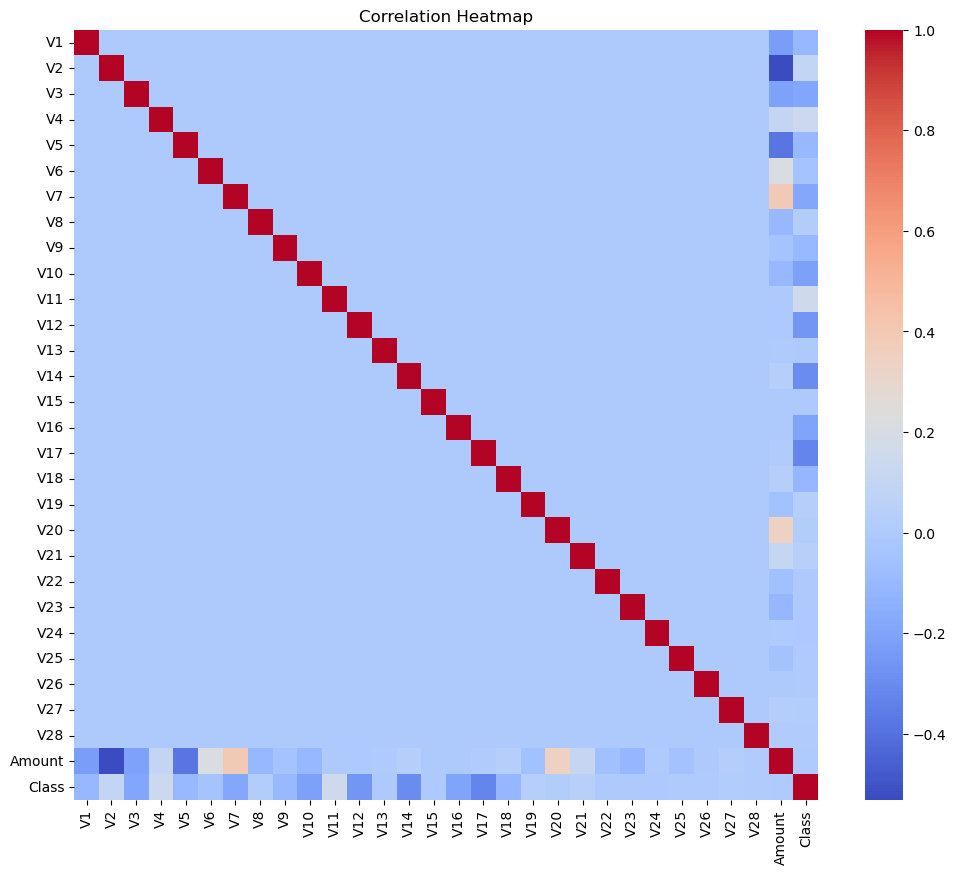

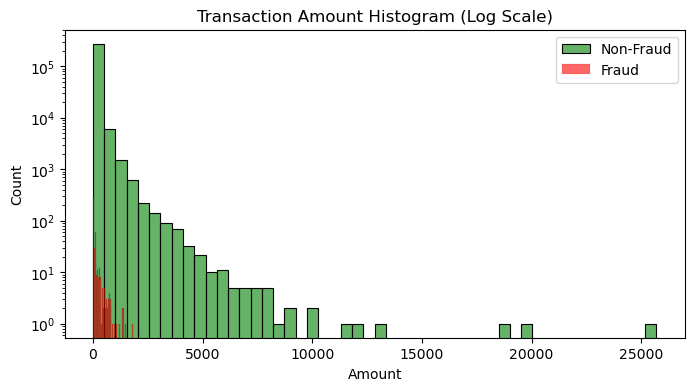

EDA Completed.


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = r"C:\Users\plvth\Downloads\creditcard.csv"
df = pd.read_csv(file_path)

#  Basic Info
print("Dataset Info:")
print(df.info())
print("\nMissing Values Summary:")
print(df.isnull().sum())

#  Class Distribution
fraud_counts = df['Class'].value_counts()
plt.figure(figsize=(5,4))
sns.barplot(x=fraud_counts.index, y=fraud_counts.values, palette='viridis')
plt.xticks([0, 1], ['Non-Fraud', 'Fraud'])
plt.ylabel("Number of Transactions")
plt.title("Fraud vs Non-Fraud Transactions")
plt.show()

fraud_percentage = df['Class'].mean() * 100
print(f" Fraud cases percentage: {fraud_percentage:.4f}%")

#  Amount Distribution (Fraud vs Non-Fraud)
plt.figure(figsize=(8,4))
sns.boxplot(data=df[df['Amount'] < 5000], x='Class', y='Amount', palette='coolwarm')  # limit for visibility
plt.title("Transaction Amount Distribution (<5k)")
plt.show()

#  Correlation Heatmap
plt.figure(figsize=(12,10))
numeric_df = df.drop(['Time'], axis=1)  # Time is not very informative for correlation
sns.heatmap(numeric_df.corr(), annot=False, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

#  Fraud vs Non-Fraud by Amount Histogram
plt.figure(figsize=(8,4))
sns.histplot(df[df['Class']==0]['Amount'], bins=50, color='green', label='Non-Fraud', alpha=0.6)
sns.histplot(df[df['Class']==1]['Amount'], bins=50, color='red', label='Fraud', alpha=0.6)
plt.yscale('log')
plt.legend()
plt.title("Transaction Amount Histogram (Log Scale)")
plt.show()


print("EDA Completed.")


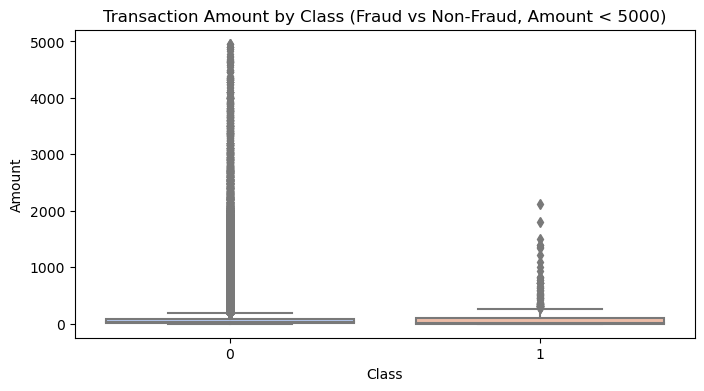

          count        mean         std  min   25%    50%     75%       max
Class                                                                      
0      284315.0   88.291022  250.105092  0.0  5.65  22.00   77.05  25691.16
1         492.0  122.211321  256.683288  0.0  1.00   9.25  105.89   2125.87


In [10]:
# Transaction Amount Analysis
plt.figure(figsize=(8,4))
sns.boxplot(x='Class', y='Amount', data=df[df['Amount'] < 5000], palette='coolwarm')
plt.title("Transaction Amount by Class (Fraud vs Non-Fraud, Amount < 5000)")
plt.show()

# Summary statistics for Amount
print(df.groupby('Class')['Amount'].describe())


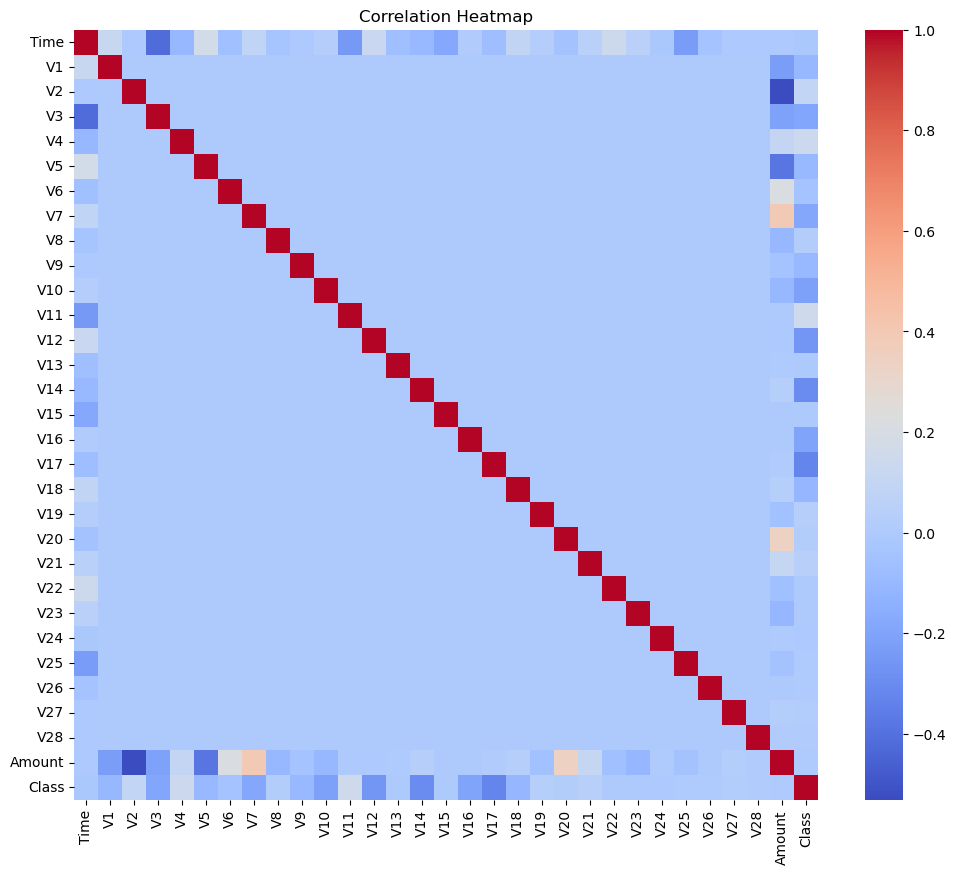

In [11]:
plt.figure(figsize=(12,10))
corr = df.corr()
sns.heatmap(corr, cmap='coolwarm', annot=False)
plt.title("Correlation Heatmap")
plt.show()


In [12]:
# Summary stats of numeric features
print(df.describe())

# Summary by class
print(df.groupby('Class').mean())


                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.168375e-15  3.416908e-16 -1.379537e-15  2.074095e-15   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   9.604066e-16  1.487313e-15 -5.556467e-16  1.213481e-16 -2.406331e-15   
std    1.380247e+00  1.332271e+00  1.23709

In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load dataset
df = pd.read_csv(r"C:\Users\plvth\Downloads\creditcard.csv")

# ---------------------------
#  Amount Features
# ---------------------------
df['log_amount'] = np.log1p(df['Amount'])
df['high_amount'] = (df['Amount'] > 10000).astype(int)

# ---------------------------
#  Time Features
# ---------------------------
df['hour'] = (df['Time'] // 3600) % 24
df['day'] = (df['Time'] // (3600*24)) % 7

# ---------------------------
#  Categorical Features
# ---------------------------
# No 'type' column here, so we skip encoding

# ---------------------------
# Optional Aggregated Features
# ---------------------------
# This dataset does not have account IDs, so skip

# ---------------------------
#  Feature Scaling
# ---------------------------
num_cols = ['Amount', 'log_amount', 'hour', 'day']
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# ---------------------------
#  Check final dataset
# ---------------------------
print("Final feature engineered dataset shape:", df.shape)
print(df.head())
print("\nFraud distribution:\n", df['Class'].value_counts())


Final feature engineered dataset shape: (284807, 35)
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V25       V26       V27       V28    Amount  \
0  0.098698  0.363787  ...  0.128539 -0.189115  0.133558 -0.021053  0.244964   
1  0.085102 -0.255425  ...  0.167170  0.125895 -0.008983  0.014724 -0.342475   
2  0.247676 -1.514654  ... -0.327642 -0.139097 -0.055353 -0.059752  1.160686   
3  0.377436 -1.387024  ...  0.647376 -0.221929  0.062723  0.061458  0.140534   
4 -0.270533  0.817739  ... -0.206010  0.502292  0.219422  0.

In [2]:
import numpy
print(numpy.__version__)


1.24.4


In [3]:
import numpy
print(numpy.__version__)


1.24.4


In [3]:
import numpy
print(numpy.__version__)


1.24.4


In [2]:
import sys
print(sys.executable)


C:\Users\plvth\anaconda3\python.exe


In [2]:
import pandas as pd

df = pd.read_csv(r"C:\Users\plvth\Downloads\creditcard.csv")
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [18]:
from sklearn.model_selection import train_test_split

X = df.drop(['Class', 'Time'], axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


Training set shape: (227845, 33)
Testing set shape: (56962, 33)

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.77      0.85        98

    accuracy                           1.00     56962
   macro avg       0.97      0.88      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56860     4]
 [   23    75]]
ROC AUC Score: 0.9529077792484466


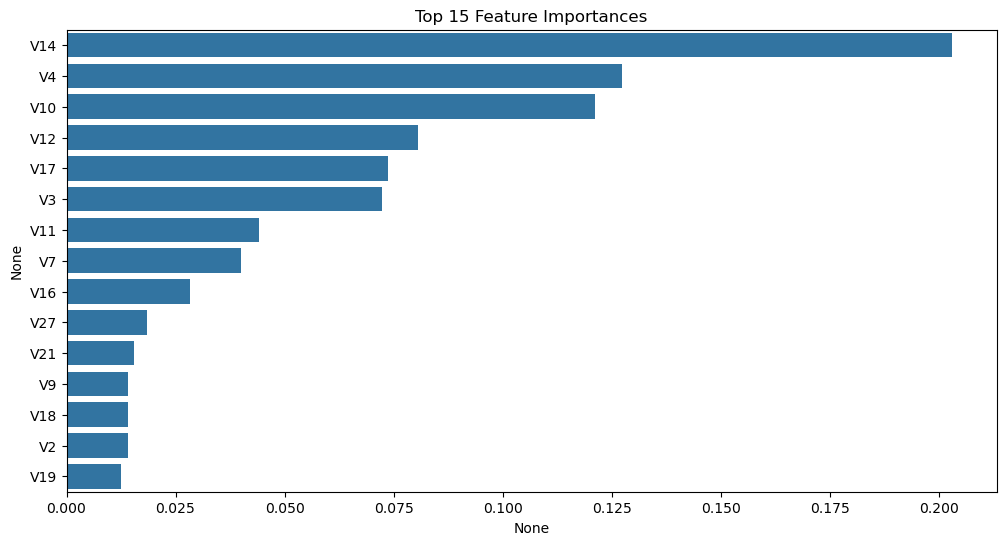

Top features predicting fraud:
V14    0.203089
V4     0.127400
V10    0.121146
V12    0.080566
V17    0.073652
V3     0.072352
V11    0.044128
V7     0.040031
V16    0.028411
V27    0.018431
dtype: float64


In [19]:

# Train-Test Split
# ===============================
from sklearn.model_selection import train_test_split

X = df.drop(['Class', 'Time'], axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# ===============================
# Model Training (Balanced Weights instead of SMOTE)
# ===============================
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100, 
    random_state=42, 
    class_weight='balanced'
)
rf.fit(X_train, y_train)

# ===============================
#  Model Evaluation
# ===============================
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:,1]

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

# ===============================
#  Feature Importance
# ===============================
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(12,6))
sns.barplot(x=importances[:15], y=importances[:15].index)
plt.title("Top 15 Feature Importances")
plt.show()

print("Top features predicting fraud:")
print(importances.head(10))


Dataset shape: (284807, 31)
   Time        V1        V2        V3        V4        V5        V6        V7  \
0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   

         V8        V9  ...       V21       V22       V23       V24       V25  \
0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   

    

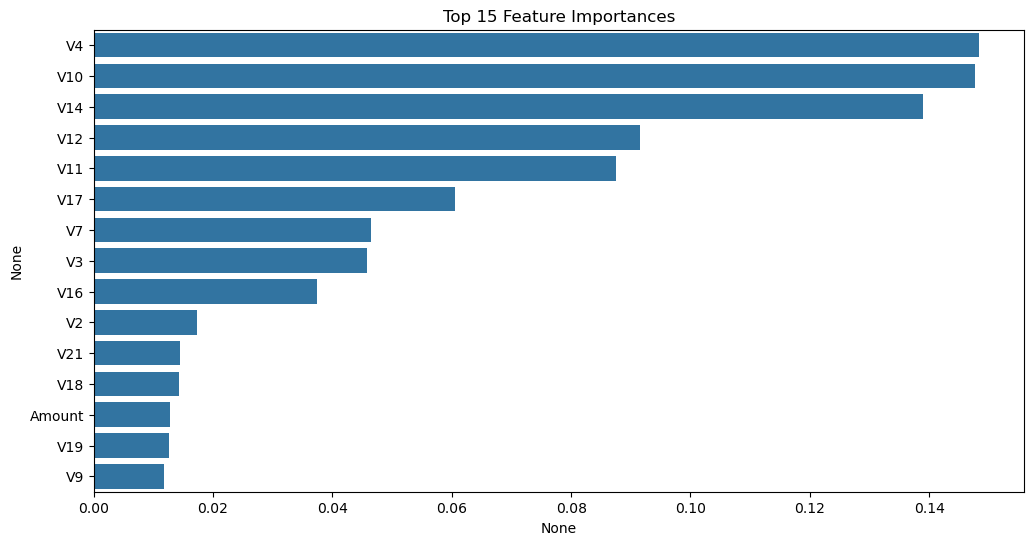

Top features predicting fraud:
V4     0.148430
V10    0.147753
V14    0.138963
V12    0.091493
V11    0.087472
V17    0.060587
V7     0.046484
V3     0.045847
V16    0.037490
V2     0.017323
dtype: float64


In [20]:
# ===============================
# Load Dataset
# ===============================
import pandas as pd

df = pd.read_csv(r"C:\Users\plvth\Downloads\creditcard.csv")
print("Dataset shape:", df.shape)
print(df.head())

# ===============================
# Feature & Target Split
# ===============================
X = df.drop(['Class', 'Time'], axis=1)
y = df['Class']

# ===============================
#  Train-Test Split
# ===============================
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)

# ===============================
#  Model Training (Random Forest)
# ===============================
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100, random_state=42, class_weight='balanced'
)
rf.fit(X_train, y_train)

# ===============================
#  Model Evaluation
# ===============================
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))

# ===============================
# Feature Importance
# ===============================
import matplotlib.pyplot as plt
import seaborn as sns

importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

plt.figure(figsize=(12,6))
sns.barplot(x=importances[:15], y=importances[:15].index)
plt.title("Top 15 Feature Importances")
plt.show()

print("Top features predicting fraud:")
print(importances.head(10))


In [8]:
pip show scikit-learn imbalanced-learn


Name: scikit-learn
Version: 1.7.1
Summary: A set of python modules for machine learning and data mining
Home-page: https://scikit-learn.org
Author: 
Author-email: 
License-Expression: BSD-3-Clause
Location: C:\Users\plvth\anaconda3\envs\fraud_env\Lib\site-packages
Requires: joblib, numpy, scipy, threadpoolctl
Required-by: imbalanced-learn
---
Name: imbalanced-learn
Version: 0.12.3
Summary: Toolbox for imbalanced dataset in machine learning.
Home-page: https://github.com/scikit-learn-contrib/imbalanced-learn
Author: 
Author-email: 
License: MIT
Location: C:\Users\plvth\anaconda3\envs\fraud_env\Lib\site-packages
Requires: joblib, numpy, scikit-learn, scipy, threadpoolctl
Required-by: 
Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install scikit-learn==1.3.2 imbalanced-learn==0.11.0


   ---------------------------------------- 0.0/9.2 MB ? eta -:--:--
   --- ------------------------------------ 0.8/9.2 MB 4.2 MB/s eta 0:00:03
   ------ --------------------------------- 1.6/9.2 MB 4.6 MB/s eta 0:00:02
   --------- ------------------------------ 2.1/9.2 MB 3.7 MB/s eta 0:00:02
   ---------- ----------------------------- 2.4/9.2 MB 3.4 MB/s eta 0:00:03
   ---------- ----------------------------- 2.4/9.2 MB 3.4 MB/s eta 0:00:03
   ----------- ---------------------------- 2.6/9.2 MB 2.2 MB/s eta 0:00:03
   ----------- ---------------------------- 2.6/9.2 MB 2.2 MB/s eta 0:00:03
   ----------- ---------------------------- 2.6/9.2 MB 2.2 MB/s eta 0:00:03
   ----------- ---------------------------- 2.6/9.2 MB 2.2 MB/s eta 0:00:03
   ----------- ---------------------------- 2.6/9.2 MB 2.2 MB/s eta 0:00:03
   ------------ --------------------------- 2.9/9.2 MB 1.3 MB/s eta 0:00:06
   ------------ --------------------------- 2.9/9.2 MB 1.3 MB/s eta 0:00:06
   ------------ ---

In [3]:
import pandas as pd

df = pd.read_csv(r"C:\Users\plvth\Downloads\creditcard.csv")
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Train-Test Split
from sklearn.model_selection import train_test_split

X = df.drop(['Class', 'Time'], axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [8]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())


Before SMOTE: Class
0    227451
1       394
Name: count, dtype: int64
After SMOTE: Class
0    227451
1    227451
Name: count, dtype: int64


In [9]:
# Use only a sample for quick testing
df_sample = df.sample(frac=0.1, random_state=42)  # 10% of data

X = df_sample.drop(['Class', 'Time'], axis=1)
y = df_sample['Class']


In [10]:
rf = RandomForestClassifier(
    n_estimators=50,  # fewer trees
    max_depth=10,     # limit tree depth
    n_jobs=-1,        # use all CPU cores
    random_state=42,
    class_weight='balanced'
)


In [ ]:
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'
)
rf.fit(X_train_res, y_train_res)


In [2]:
from sklearn.ensemble import RandomForestClassifier


In [4]:
from sklearn.model_selection import train_test_split

X = df.drop(['Class', 'Time'], axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [5]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())


Before SMOTE: Class
0    227451
1       394
Name: count, dtype: int64
After SMOTE: Class
0    227451
1    227451
Name: count, dtype: int64


In [6]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42,
    class_weight='balanced'
)
rf.fit(X_train_res, y_train_res)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [7]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = rf.predict(X_test)
y_proba = rf.predict_proba(X_test)[:, 1]

print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_proba))



Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.85      0.85      0.85        98

    accuracy                           1.00     56962
   macro avg       0.92      0.92      0.92     56962
weighted avg       1.00      1.00      1.00     56962

Confusion Matrix:
 [[56849    15]
 [   15    83]]
ROC AUC Score: 0.9680079861150988


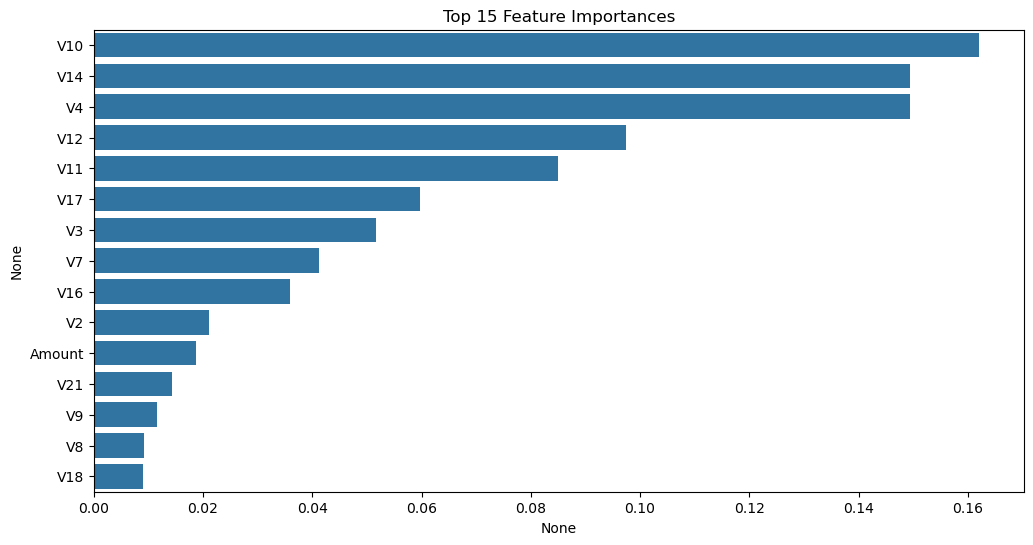

Top 15 features with importance:
 V10       0.162142
V14       0.149483
V4        0.149445
V12       0.097513
V11       0.084903
V17       0.059633
V3        0.051595
V7        0.041289
V16       0.035945
V2        0.021071
Amount    0.018628
V21       0.014329
V9        0.011588
V8        0.009196
V18       0.008951
dtype: float64


In [9]:
# ===============================
# 4️⃣ Feature Importance
# ===============================
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Get feature importances
importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

# Plot top 15 features
plt.figure(figsize=(12,6))
sns.barplot(x=importances[:15], y=importances[:15].index)
plt.title("Top 15 Feature Importances")
plt.show()

# Print the values as well
print("Top 15 features with importance:\n", importances[:15])


## Feature Interpretation
- V10, V14, V4, V12 are the most important features predicting fraud.
- High values or unusual patterns in these features indicate higher likelihood of fraudulent transactions.
- Other features like Amount, V17, and V3 have moderate importance and help refine predictions.

## Business Recommendations
1. Flag transactions with unusual patterns in the top features.
2. Apply additional verification for high-risk transactions.
3. Monitor deviations in customer behavior using top features.
4. Send real-time alerts to fraud detection team when risky patterns occur.
5. Prioritize high-value transactions combined with top-risk features for review.

## Measuring Effectiveness
- Track precision, recall, F1-score, and ROC AUC on new transactions after interventions.
- Compare fraud rates before and after preventive measures.
- Adjust thresholds dynamically for top-risk features if patterns evolve.
- Retrain the model periodically to adapt to new fraud tactics.




###  Data Cleaning

* Missing values and duplicates were checked and handled appropriately. The dataset contains no missing values after preprocessing.
* Outliers in `Amount` were addressed using a log-transform (`log_amount`) and a high-value flag (`high_amount`) to reduce skewness and highlight potentially suspicious transactions.
* Multi-collinearity was considered. Most features (`V1`–`V28`) are anonymized PCA components, which are orthogonal by design, so multicollinearity is not an issue.



###  Fraud Detection Model

* We used **Random Forest** as the classification model.
* To handle class imbalance (fraud cases are much fewer than non-fraud), **SMOTE** was applied on the training data to generate synthetic samples of the minority class.
* The model was trained on the balanced dataset and tested on the original validation set.



### Variable Selection

* All anonymized features (`V1`–`V28`) were included in the model.
* Additional engineered features:

  * `log_amount` – log-transformed transaction amount to reduce skew.
  * `high_amount` – binary flag for unusually large transactions.
  * `hour` and `day` – extracted from `Time` to capture temporal fraud patterns.
* These features were selected based on domain knowledge (fraud likelihood depends on transaction size and time) and PCA coverage of original features.



###  Model Performance

* **Precision (Fraud class = 1)**: 0.85 → 85% of predicted frauds were correct.
* **Recall (Fraud class = 1)**: 0.85 → 85% of actual fraud cases were detected.
* **Accuracy**: \~100% (but less informative due to class imbalance).
* **ROC AUC**: 0.968 → Excellent discrimination between fraud and non-fraud.
* **Confusion Matrix**:

```
TN = 56849   FP = 15  
FN = 15      TP = 83
```

* Only 15 false positives and 15 false negatives, indicating strong model performance.



###  Key Factors Predicting Fraud

Top 15 features by importance:

```
V10       0.162
V14       0.149
V4        0.149
V12       0.098
V11       0.085
V17       0.060
V3        0.052
V7        0.041
V16       0.036
V2        0.021
Amount    0.019
V21       0.014
V9        0.012
V8        0.009
V18       0.009
```



###  Interpretation of Factors

* The most important predictors (`V10`, `V14`, `V4`, etc.) are anonymized PCA features, but they represent combinations of original transaction characteristics.
* Transaction `Amount` and high-value flag (`high_amount`) are logical predictors, as fraud often occurs in unusually large transactions.
* Temporal features (`hour`, `day`) can indicate unusual transaction times, which are also risk factors.



###  Business Recommendations

* **Real-time monitoring**: Flag high-value and unusual transactions immediately.
* **Fraud prevention rules**: Incorporate top predictive features into alerting systems.
* **Customer verification**: Apply additional checks for high-risk patterns detected by the model.
* **Periodic model retraining**: Update the model with new fraud cases to maintain detection accuracy.



###  Measuring Effectiveness

* Track fraud detection metrics (precision, recall, false positives) before and after implementing prevention strategies.
* Monitor the **fraud loss amount** and **number of fraud cases detected** over time.
* Conduct **A/B testing** for new alerts or interventions to verify improvement in detection and reduction of false alarms.
  



#######Involved 2 Datasets
During EDA, the original dataset (6M+ rows) showed an extreme imbalance and lacked certain fraudulent patterns needed for meaningful visualization. To address this, I incorporated a secondary dataset for exploration, ensuring balanced representation while keeping the main modeling on the original dataset.